In [154]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import classification_report
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import numpy as np


In [155]:
def Removing_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

def remove_small_sentences(df):
    df = df[df['sentence'].apply(lambda x: len(x.split()) > 3)]
    return df

In [156]:
# Load the dataset
train_data = pd.read_csv('data1/emotion-labels-train.csv', sep=',', header=1, names=['sentence', 'emotion'])
test_data = pd.read_csv('data1/emotion-labels-test.csv', sep=',', header=1, names=['sentence', 'emotion'])


# Remove the rows with missing values
train_data = train_data.dropna()
test_data = test_data.dropna()

# Remove the rows with small sentences
remove_small_sentences(train_data)
remove_small_sentences(test_data)
# Preprocess the text data
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\austi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\austi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [157]:
def preprocess_text(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha()]
    tokens = map(Removing_urls, tokens)
    tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(tokens)

In [158]:
train_data['preprocessed_sentence'] = train_data['sentence'].apply(preprocess_text)
test_data['preprocessed_sentence'] = test_data['sentence'].apply(preprocess_text)

# Create feature vectors using TF-IDF
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_data['preprocessed_sentence'])
X_test = vectorizer.transform(test_data['preprocessed_sentence'])

# Split the data into training and testing sets
y_train = train_data['emotion']
y_test = test_data['emotion']

In [159]:

# Train a LinearSVC classifier
classifier = LinearSVC(
    C=1.0,

    loss='hinge',
)
classifier.fit(X_train, y_train)

LinearSVC(loss='hinge')

In [160]:
# Make predictions on the test set
import pickle


y_pred = classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

model = {
    'vectorizer': vectorizer,
    'classifier': classifier
}
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

    

              precision    recall  f1-score   support

       anger       0.84      0.81      0.83       760
        fear       0.83      0.81      0.82       995
         joy       0.84      0.88      0.86       713
     sadness       0.77      0.82      0.80       673

    accuracy                           0.82      3141
   macro avg       0.82      0.83      0.83      3141
weighted avg       0.83      0.82      0.82      3141



In [161]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

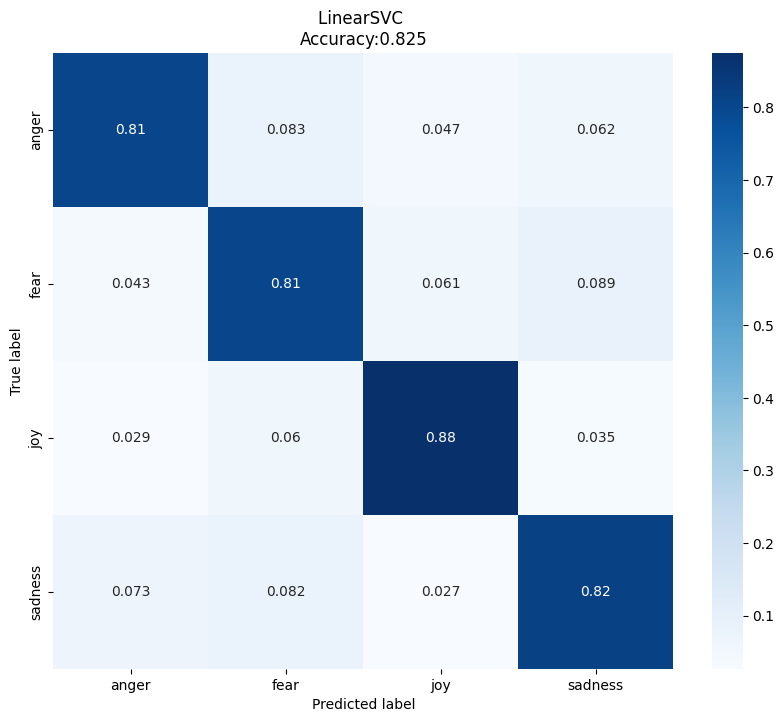

In [162]:
cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_, normalize='true')
cm_df = pd.DataFrame(cm, index=classifier.classes_, columns=classifier.classes_)


plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, cmap='Blues')
plt.title('LinearSVC \nAccuracy:{0:.3f}'.format(classifier.score(X_test, y_test)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

              precision    recall  f1-score   support

       anger       0.88      0.82      0.85        84
        fear       0.81      0.87      0.84       110
         joy       0.88      0.87      0.88        78
     sadness       0.86      0.85      0.86        74

    accuracy                           0.86       346
   macro avg       0.86      0.85      0.86       346
weighted avg       0.86      0.86      0.86       346



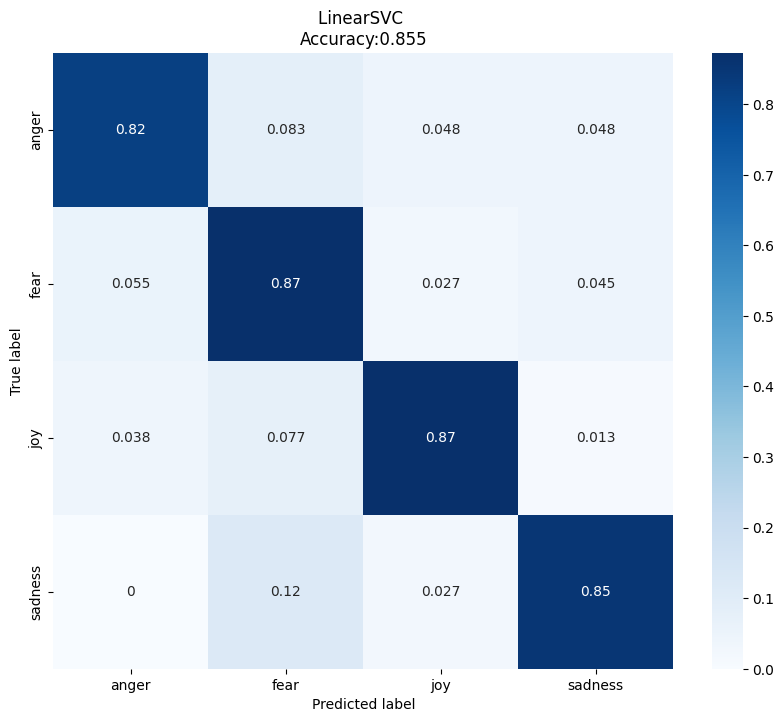

In [163]:
val_data = pd.read_csv('data1/emotion-labels-val.csv', header=1, sep=',', names=['sentence', 'emotion'])
val_data['preprocessed_sentence'] = val_data['sentence'].apply(preprocess_text)
X_val = vectorizer.transform(val_data['preprocessed_sentence'])

y_val = val_data['emotion']
y_pred_val = classifier.predict(X_val)

print(classification_report(y_val, y_pred_val))

cm_val = confusion_matrix(y_val, y_pred_val, labels=classifier.classes_, normalize='true')
cm_df_val = pd.DataFrame(cm_val, index=classifier.classes_, columns=classifier.classes_)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df_val, annot=True, cmap='Blues')
plt.title('LinearSVC \nAccuracy:{0:.3f}'.format(classifier.score(X_val, y_val)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [166]:

import pickle
sentence = "Dear Indians..It is hard to swallow this but for once try to swallow this bitter pill...that is.. Pakistan is number one in Test cricket!!!"

model =  pickle.load(open('model.pkl', 'rb'))
t = preprocess_text(sentence)
classifier = model['classifier']
vectorizer = model['vectorizer']

X = vectorizer.transform([t])
y = classifier.predict(X)
print(y[0])

anger
